In [286]:
!pip3 install pandas

In [465]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [466]:
df = pd.read_csv("nba_games.csv", index_col=0)


# Display the first few rows to understand the data
print(df.head())

# Print the column names to see all available columns
print(df.columns)

      mp   mp.1    fg    fga    fg%   3p   3pa    3p%    ft   fta  ...  \
0  240.0  240.0  39.0   81.0  0.481  6.0  20.0  0.300  14.0  18.0  ...   
1  240.0  240.0  36.0  100.0  0.360  7.0  31.0  0.226  16.0  19.0  ...   
2  240.0  240.0  37.0   85.0  0.435  8.0  19.0  0.421  17.0  23.0  ...   
3  240.0  240.0  41.0   89.0  0.461  8.0  21.0  0.381  17.0  19.0  ...   
4  240.0  240.0  27.0   86.0  0.314  6.0  26.0  0.231  15.0  20.0  ...   

   tov%_max_opp  usg%_max_opp  ortg_max_opp  drtg_max_opp  team_opp  \
0          22.8          29.0         178.0         111.0       DAL   
1          50.0          32.6         152.0         111.0       ATL   
2          20.0          30.9         148.0         116.0       SAS   
3          28.6          30.9         138.0         118.0       MIN   
4          16.8          30.9         157.0          90.0       MEM   

   total_opp  home_opp  season        date    won  
0         95         1    2016  2015-12-09   True  
1         98         0  

In [467]:
print(df.describe())


                 mp          mp.1            fg           fga           fg%  \
count  17772.000000  17772.000000  17772.000000  17772.000000  17772.000000   
mean     241.564258    241.564258     39.954817     87.020538      0.460049   
std        7.002952      7.002952      5.225686      7.233960      0.054656   
min      240.000000    240.000000     19.000000     60.000000      0.269000   
25%      240.000000    240.000000     36.000000     82.000000      0.422000   
50%      240.000000    240.000000     40.000000     87.000000      0.459000   
75%      240.000000    240.000000     43.000000     92.000000      0.495000   
max      340.000000    340.000000     63.000000    128.000000      0.687000   

                 3p           3pa           3p%            ft           fta  \
count  17772.000000  17772.000000  17772.000000  17772.000000  17772.000000   
mean      11.022901     30.800923      0.356935     17.415710     22.627279   
std        3.961903      7.905325      0.089744    

In [468]:
df.dtypes

mp           float64
mp.1         float64
fg           float64
fga          float64
fg%          float64
              ...   
total_opp      int64
home_opp       int64
season         int64
date          object
won             bool
Length: 150, dtype: object

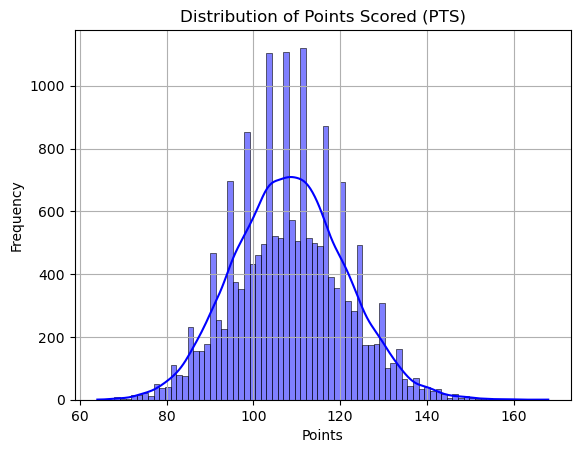

In [469]:


# Histogram for Distribution of Points Scored (PTS)

sns.histplot(df['pts'], kde=True, color='blue')
plt.title("Distribution of Points Scored (PTS)")
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

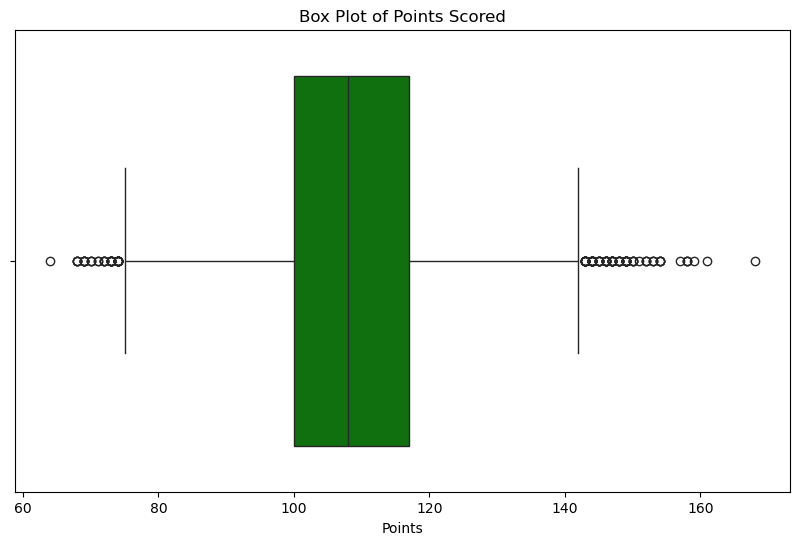

In [470]:
# Box Plot for Points Scored to view outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['pts'], color='green')
plt.title('Box Plot of Points Scored')
plt.xlabel('Points')
plt.show()

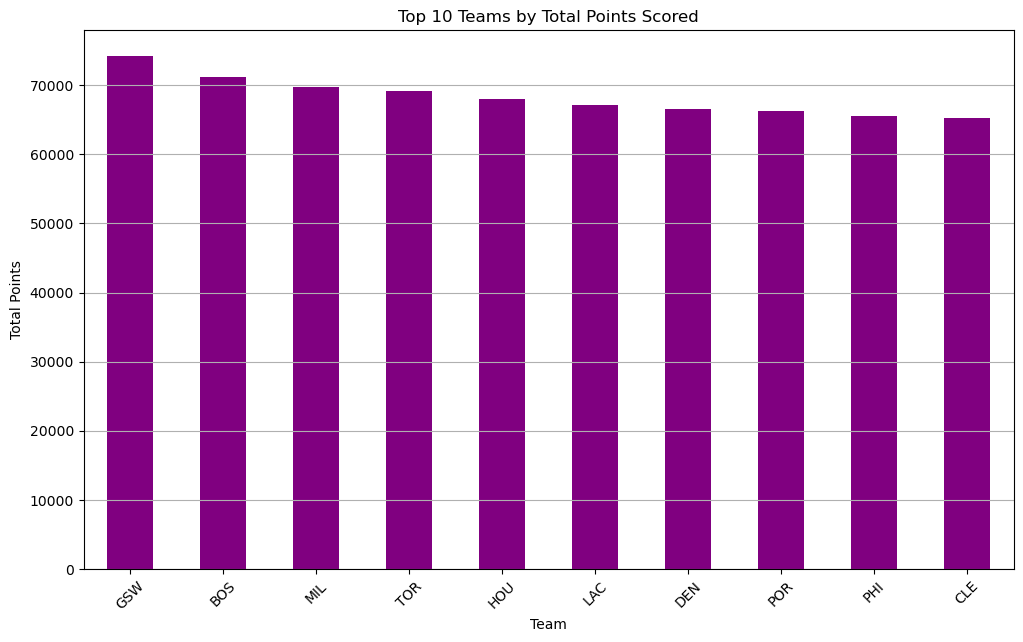

In [471]:
# Bar Plot of Top 10 Players by Total Points Scored
top_players = df.groupby('team')['pts'].sum().nlargest(10)
plt.figure(figsize=(12, 7))
top_players.plot(kind='bar', color='purple')
plt.title('Top 10 Teams by Total Points Scored')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


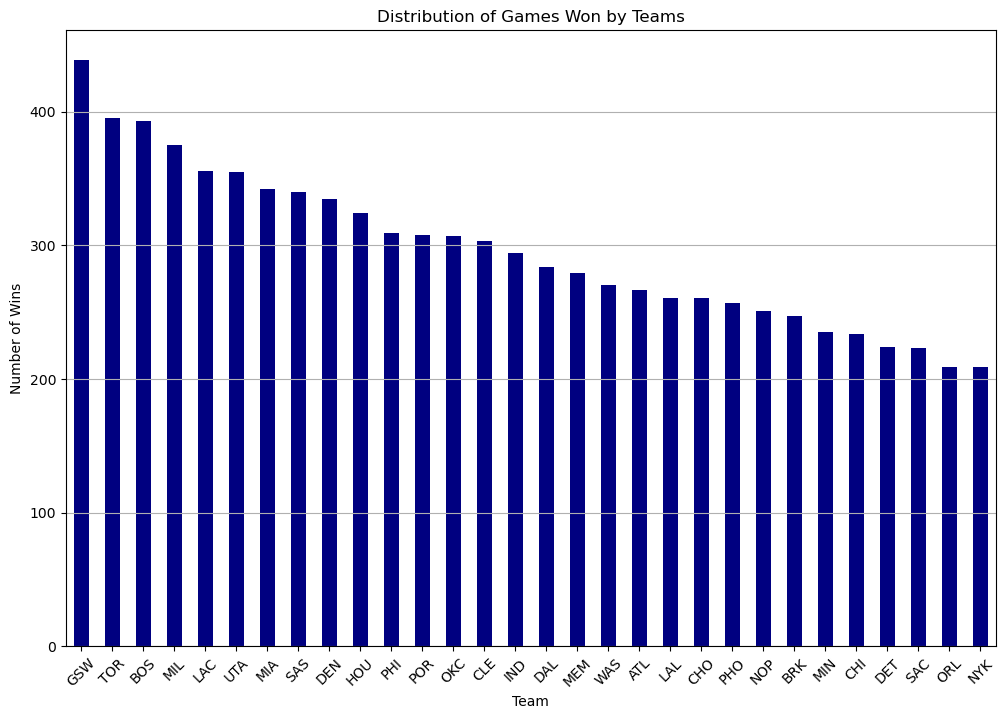

In [472]:


# Assuming 'won' column has boolean values (True for win, False for not win)
# and 'team' column has the team names
win_counts = df[df['won'] == True]['team'].value_counts()

plt.figure(figsize=(12, 8))
win_counts.plot(kind='bar', color='navy')
plt.title('Distribution of Games Won by Teams')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


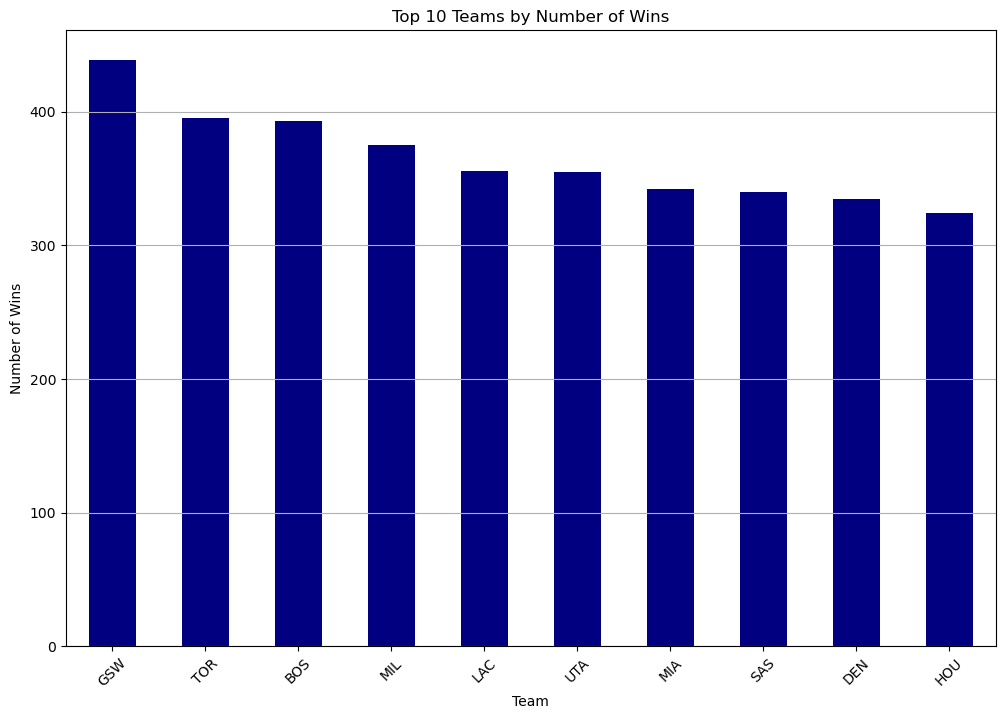

In [473]:

win_counts = df[df['won'] == True]['team'].value_counts().nlargest(10)

plt.figure(figsize=(12, 8))
win_counts.plot(kind='bar', color='navy')
plt.title('Top 10 Teams by Number of Wins')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


In [474]:
df = df.sort_values("date")

In [475]:
df = df.reset_index(drop=True)

In [476]:
del df["mp.1"]
del df["mp_opp.1"]
del df["index_opp"]

In [477]:
def add_target(group):
    group["target"] = group["won"].shift(-1)
    return group

df = df.groupby("team", group_keys=False).apply(add_target)

C:\Users\chara\AppData\Local\Temp\ipykernel_25936\3080091488.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group["target"] = group["won"].shift(-1)
C:\Users\chara\AppData\Local\Temp\ipykernel_25936\3080091488.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group["target"] = group["won"].shift(-1)
C:\Users\chara\AppData\Local\Temp\ipykernel_25936\3080091488.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

In [478]:
df[df["team"] == "WAS"]

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
11,240.0,33.0,84.0,0.393,7.0,28.0,0.250,15.0,25.0,0.600,...,25.2,134.0,98.0,ORL,87,1,2016,2015-10-28,True,True
63,240.0,35.0,68.0,0.515,12.0,21.0,0.571,36.0,44.0,0.818,...,32.4,138.0,122.0,MIL,113,1,2016,2015-10-30,True,False
69,240.0,38.0,90.0,0.422,6.0,22.0,0.273,28.0,33.0,0.848,...,28.7,153.0,108.0,NYK,117,0,2016,2015-10-31,False,True
124,240.0,42.0,87.0,0.483,8.0,23.0,0.348,10.0,14.0,0.714,...,30.0,160.0,109.0,SAS,99,0,2016,2015-11-04,True,False
161,240.0,36.0,88.0,0.409,8.0,25.0,0.320,18.0,23.0,0.783,...,41.6,146.0,103.0,BOS,118,1,2016,2015-11-06,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,240.0,38.0,82.0,0.463,8.0,21.0,0.381,18.0,20.0,0.900,...,34.4,245.0,116.0,BOS,144,1,2022,2022-04-03,False,True
17483,240.0,56.0,101.0,0.554,13.0,30.0,0.433,7.0,14.0,0.500,...,32.8,168.0,132.0,MIN,114,1,2022,2022-04-05,True,False
17510,240.0,42.0,86.0,0.488,10.0,35.0,0.286,9.0,11.0,0.818,...,60.2,159.0,114.0,ATL,118,1,2022,2022-04-06,False,False
17538,240.0,35.0,69.0,0.507,9.0,28.0,0.321,13.0,17.0,0.765,...,35.5,135.0,104.0,NYK,114,0,2022,2022-04-08,False,False


In [479]:
df["target"][pd.isnull(df["target"])] = 2
df["target"] = df["target"].astype(int, errors="ignore")

C:\Users\chara\AppData\Local\Temp\ipykernel_25936\2793819745.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["target"][pd.isnull(df["target"])] = 2
C:\Users\chara\AppData\Local\Temp\ipykernel_25936\2793819745.py:1: SettingWithCopyWarn

In [480]:
df["won"].value_counts()

won
False    8886
True     8886
Name: count, dtype: int64

In [481]:
df["target"].value_counts()

target
1    8872
0    8870
2      30
Name: count, dtype: int64

In [482]:
nulls = pd.isnull(df).sum()

In [483]:
nulls = nulls[nulls > 0]

In [484]:
valid_columns = df.columns[~df.columns.isin(nulls.index)]

In [485]:
valid_columns

Index(['mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%',
       ...
       'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp', 'team_opp', 'total_opp',
       'home_opp', 'season', 'date', 'won', 'target'],
      dtype='object', length=142)

In [486]:
df = df[valid_columns].copy()

In [487]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,240.0,35.0,83.0,0.422,6.0,18.0,0.333,19.0,27.0,0.704,...,43.7,206.0,104.0,GSW,111,1,2016,2015-10-27,False,0
1,240.0,38.0,94.0,0.404,9.0,29.0,0.310,10.0,17.0,0.588,...,34.6,162.0,104.0,CHI,97,1,2016,2015-10-27,False,1
2,240.0,37.0,87.0,0.425,7.0,19.0,0.368,16.0,23.0,0.696,...,29.0,138.0,105.0,CLE,95,0,2016,2015-10-27,True,1
3,240.0,41.0,96.0,0.427,9.0,30.0,0.300,20.0,22.0,0.909,...,38.9,201.0,120.0,NOP,95,0,2016,2015-10-27,True,1
4,240.0,37.0,82.0,0.451,8.0,27.0,0.296,12.0,15.0,0.800,...,23.6,132.0,104.0,DET,106,0,2016,2015-10-27,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,240.0,34.0,85.0,0.400,15.0,38.0,0.395,14.0,19.0,0.737,...,36.3,133.0,112.0,GSW,107,0,2022,2022-06-10,False,0
17768,240.0,41.0,88.0,0.466,9.0,40.0,0.225,13.0,15.0,0.867,...,94.4,300.0,112.0,BOS,94,0,2022,2022-06-13,True,1
17769,240.0,31.0,75.0,0.413,11.0,32.0,0.344,21.0,31.0,0.677,...,36.2,222.0,107.0,GSW,104,1,2022,2022-06-13,False,0
17770,240.0,34.0,80.0,0.425,11.0,28.0,0.393,11.0,12.0,0.917,...,31.5,186.0,111.0,GSW,103,0,2022,2022-06-16,False,2


In [488]:
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import TimeSeriesSplit

rr = RidgeClassifier(alpha=1)

split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(rr, 
                                n_features_to_select=30, 
                                direction="forward",
                                cv=split,
                                n_jobs=1
                               )

In [489]:
removed_columns = ["season", "date", "won", "target", "team", "team_opp"]
selected_columns = df.columns[~df.columns.isin(removed_columns)]

In [490]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [491]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,0.0,0.363636,0.338235,0.366029,0.206897,0.212121,0.395487,0.418605,0.412698,0.654609,...,0.277279,0.554502,0.317647,GSW,0.451923,1.0,2016,2015-10-27,False,0
1,0.0,0.431818,0.500000,0.322967,0.310345,0.378788,0.368171,0.209302,0.253968,0.519253,...,0.160462,0.345972,0.317647,CHI,0.317308,1.0,2016,2015-10-27,False,1
2,0.0,0.409091,0.397059,0.373206,0.241379,0.227273,0.437055,0.348837,0.349206,0.645274,...,0.088575,0.232227,0.329412,CLE,0.298077,0.0,2016,2015-10-27,True,1
3,0.0,0.500000,0.529412,0.377990,0.310345,0.393939,0.356295,0.441860,0.333333,0.893816,...,0.215661,0.530806,0.505882,NOP,0.298077,0.0,2016,2015-10-27,True,1
4,0.0,0.409091,0.323529,0.435407,0.275862,0.348485,0.351544,0.255814,0.222222,0.766628,...,0.019255,0.203791,0.317647,DET,0.403846,0.0,2016,2015-10-27,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,0.0,0.340909,0.367647,0.313397,0.517241,0.515152,0.469121,0.302326,0.285714,0.693116,...,0.182285,0.208531,0.411765,GSW,0.413462,0.0,2022,2022-06-10,False,0
17768,0.0,0.500000,0.411765,0.471292,0.310345,0.545455,0.267221,0.279070,0.222222,0.844807,...,0.928113,1.000000,0.411765,BOS,0.288462,0.0,2022,2022-06-13,True,1
17769,0.0,0.272727,0.220588,0.344498,0.379310,0.424242,0.408551,0.465116,0.476190,0.623104,...,0.181001,0.630332,0.352941,GSW,0.384615,1.0,2022,2022-06-13,False,0
17770,0.0,0.340909,0.294118,0.373206,0.379310,0.363636,0.466746,0.232558,0.174603,0.903151,...,0.120668,0.459716,0.400000,GSW,0.375000,0.0,2022,2022-06-16,False,2


In [492]:
sfs.fit(df[selected_columns], df["target"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=30, n_jobs=1)

In [494]:

predictors = list(selected_columns[sfs.get_support()])

In [495]:
predictors

['mp',
 'fg%',
 '3p%',
 'orb',
 'ts%',
 'usg%',
 '3p%_max',
 'ft_max',
 'fta_max',
 '+/-_max',
 'drb%_max',
 'trb%_max',
 'tov%_max',
 'usg%_max',
 'mp_opp',
 'fg_opp',
 '3p_opp',
 'ft%_opp',
 'blk_opp',
 'usg%_opp',
 'fga_max_opp',
 '3p_max_opp',
 'ft_max_opp',
 'ft%_max_opp',
 'blk_max_opp',
 'pf_max_opp',
 'pts_max_opp',
 'drb%_max_opp',
 'blk%_max_opp',
 'usg%_max_opp']

# For Lasso 

# Linear SVC

# Ridge 

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LassoCV

def backtest(data, model, predictors, start=2, step=1):
    all_predictions = []
    
    seasons = sorted(data["season"].unique())
    
    for i in range(start, len(seasons), step):
        season = seasons[i]
        train = data[data["season"] < season]
        test = data[data["season"] == season]
        
        
        model.fit(train[predictors], train["target"])
        
        # add coeff of predictors 
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

Accuracy: 0.5404582885785894


In [497]:
predictions = backtest(df, rr, predictors)

In [498]:
predictions

,actual,prediction
5250,1,0.516590
5251,1,0.500162
5252,0,0.482453
5253,1,0.485363
5254,0,0.488937
...,...,...
17767,0,0.476331
17768,1,0.529089
17769,0,0.581802
17770,2,0.489614


In [514]:
from sklearn.metrics import accuracy_score

accuracy_score(predictions["actual"], predictions["prediction"])


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [500]:
df.groupby(["home"]).apply(lambda x: x[x["won"] == 1].shape[0] / x.shape[0])

C:\Users\chara\AppData\Local\Temp\ipykernel_25936\330557953.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(["home"]).apply(lambda x: x[x["won"] == 1].shape[0] / x.shape[0])


home
0.0    0.428314
1.0    0.571686
dtype: float64

In [501]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,0.0,0.363636,0.338235,0.366029,0.206897,0.212121,0.395487,0.418605,0.412698,0.654609,...,0.277279,0.554502,0.317647,GSW,0.451923,1.0,2016,2015-10-27,False,0
1,0.0,0.431818,0.500000,0.322967,0.310345,0.378788,0.368171,0.209302,0.253968,0.519253,...,0.160462,0.345972,0.317647,CHI,0.317308,1.0,2016,2015-10-27,False,1
2,0.0,0.409091,0.397059,0.373206,0.241379,0.227273,0.437055,0.348837,0.349206,0.645274,...,0.088575,0.232227,0.329412,CLE,0.298077,0.0,2016,2015-10-27,True,1
3,0.0,0.500000,0.529412,0.377990,0.310345,0.393939,0.356295,0.441860,0.333333,0.893816,...,0.215661,0.530806,0.505882,NOP,0.298077,0.0,2016,2015-10-27,True,1
4,0.0,0.409091,0.323529,0.435407,0.275862,0.348485,0.351544,0.255814,0.222222,0.766628,...,0.019255,0.203791,0.317647,DET,0.403846,0.0,2016,2015-10-27,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,0.0,0.340909,0.367647,0.313397,0.517241,0.515152,0.469121,0.302326,0.285714,0.693116,...,0.182285,0.208531,0.411765,GSW,0.413462,0.0,2022,2022-06-10,False,0
17768,0.0,0.500000,0.411765,0.471292,0.310345,0.545455,0.267221,0.279070,0.222222,0.844807,...,0.928113,1.000000,0.411765,BOS,0.288462,0.0,2022,2022-06-13,True,1
17769,0.0,0.272727,0.220588,0.344498,0.379310,0.424242,0.408551,0.465116,0.476190,0.623104,...,0.181001,0.630332,0.352941,GSW,0.384615,1.0,2022,2022-06-13,False,0
17770,0.0,0.340909,0.294118,0.373206,0.379310,0.363636,0.466746,0.232558,0.174603,0.903151,...,0.120668,0.459716,0.400000,GSW,0.375000,0.0,2022,2022-06-16,False,2


In [502]:
df.columns

Index(['mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%',
       ...
       'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp', 'team_opp', 'total_opp',
       'home_opp', 'season', 'date', 'won', 'target'],
      dtype='object', length=142)

In [503]:

import numpy as np
df_rolling = df[list(selected_columns) + ["won", "team", "season"]]

def find_team_averages(team):
    # Select only numeric columns for the rolling calculation
    numeric_cols = team.select_dtypes(include=[np.number])
    rolling_means = numeric_cols.rolling(window=10).mean()
    # Optional: merge rolling means with non-numeric data
    return pd.concat([rolling_means, team[team.columns.difference(numeric_cols.columns)]], axis=1)

df_rolling = df_rolling.groupby(["team", "season"], group_keys=False).apply(find_team_averages)


C:\Users\chara\AppData\Local\Temp\ipykernel_25936\2336071612.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rolling = df_rolling.groupby(["team", "season"], group_keys=False).apply(find_team_averages)


In [504]:
df_rolling

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp,season,team,won
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOP,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLE,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHI,True
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GSW,True
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATL,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,0.0,0.381818,0.292647,0.428230,0.468966,0.477273,0.448100,0.434884,0.373016,0.764177,...,0.1113,0.471908,0.170603,0.431754,0.522353,0.348077,0.5,2022.0,BOS,False
17768,0.0,0.502273,0.364706,0.517703,0.455172,0.481818,0.440736,0.320930,0.282540,0.757993,...,0.1171,0.374109,0.321566,0.642654,0.564706,0.392308,0.4,2022.0,GSW,True
17769,0.0,0.354545,0.279412,0.404545,0.437931,0.465152,0.429572,0.434884,0.385714,0.736639,...,0.1113,0.483229,0.174711,0.438863,0.483529,0.350000,0.5,2022.0,BOS,False
17770,0.0,0.354545,0.294118,0.389952,0.434483,0.459091,0.431710,0.406977,0.357143,0.754142,...,0.1111,0.483229,0.172144,0.460190,0.472941,0.344231,0.5,2022.0,BOS,False


In [505]:
rolling_cols = [f"{col}_10" for col in df_rolling.columns]
df_rolling.columns = rolling_cols
df = pd.concat([df, df_rolling], axis=1)

In [506]:
df = df.dropna()

In [507]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,blk%_max_opp_10,tov%_max_opp_10,usg%_max_opp_10,ortg_max_opp_10,drtg_max_opp_10,total_opp_10,home_opp_10,season_10,team_10,won_10
243,0.0,0.522727,0.382353,0.523923,0.344828,0.333333,0.457245,0.255814,0.238095,0.708285,...,0.0679,0.413522,0.124134,0.361611,0.449412,0.347115,0.4,2016.0,ATL,True
251,0.0,0.659091,0.426471,0.645933,0.620690,0.515152,0.562945,0.325581,0.238095,0.927655,...,0.0772,0.469497,0.219641,0.394787,0.531765,0.324038,0.5,2016.0,GSW,True
252,0.0,0.386364,0.382353,0.358852,0.206897,0.181818,0.445368,0.511628,0.412698,0.827305,...,0.1145,0.437841,0.138126,0.507109,0.360000,0.351923,0.6,2016.0,MEM,True
253,0.0,0.500000,0.382353,0.497608,0.344828,0.318182,0.475059,0.325581,0.349206,0.593932,...,0.0759,0.512159,0.133633,0.277251,0.388235,0.308654,0.4,2016.0,IND,True
256,0.0,0.318182,0.132353,0.500000,0.275862,0.272727,0.432304,0.581395,0.444444,0.879813,...,0.0982,0.313312,0.179974,0.500000,0.471765,0.380769,0.5,2016.0,POR,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,0.0,0.340909,0.367647,0.313397,0.517241,0.515152,0.469121,0.302326,0.285714,0.693116,...,0.1113,0.471908,0.170603,0.431754,0.522353,0.348077,0.5,2022.0,BOS,False
17768,0.0,0.500000,0.411765,0.471292,0.310345,0.545455,0.267221,0.279070,0.222222,0.844807,...,0.1171,0.374109,0.321566,0.642654,0.564706,0.392308,0.4,2022.0,GSW,True
17769,0.0,0.272727,0.220588,0.344498,0.379310,0.424242,0.408551,0.465116,0.476190,0.623104,...,0.1113,0.483229,0.174711,0.438863,0.483529,0.350000,0.5,2022.0,BOS,False
17770,0.0,0.340909,0.294118,0.373206,0.379310,0.363636,0.466746,0.232558,0.174603,0.903151,...,0.1111,0.483229,0.172144,0.460190,0.472941,0.344231,0.5,2022.0,BOS,False


In [508]:
def shift_col(team, col_name):
    next_col = team[col_name].shift(-1)
    return next_col

def add_col(df, col_name):
    return df.groupby("team", group_keys=False).apply(lambda x: shift_col(x, col_name))

df["home_next"] = add_col(df, "home")
df["team_opp_next"] = add_col(df, "team_opp")
df["date_next"] = add_col(df, "date")

C:\Users\chara\AppData\Local\Temp\ipykernel_25936\1688004556.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby("team", group_keys=False).apply(lambda x: shift_col(x, col_name))
C:\Users\chara\AppData\Local\Temp\ipykernel_25936\1688004556.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby("team", group_keys=False).apply(lambda x: shift_col(x, col_name))
C:\Users\chara\A

In [509]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,ortg_max_opp_10,drtg_max_opp_10,total_opp_10,home_opp_10,season_10,team_10,won_10,home_next,team_opp_next,date_next
243,0.0,0.522727,0.382353,0.523923,0.344828,0.333333,0.457245,0.255814,0.238095,0.708285,...,0.361611,0.449412,0.347115,0.4,2016.0,ATL,True,0.0,BOS,2015-11-13
251,0.0,0.659091,0.426471,0.645933,0.620690,0.515152,0.562945,0.325581,0.238095,0.927655,...,0.394787,0.531765,0.324038,0.5,2016.0,GSW,True,1.0,BRK,2015-11-14
252,0.0,0.386364,0.382353,0.358852,0.206897,0.181818,0.445368,0.511628,0.412698,0.827305,...,0.507109,0.360000,0.351923,0.6,2016.0,MEM,True,0.0,MIN,2015-11-15
253,0.0,0.500000,0.382353,0.497608,0.344828,0.318182,0.475059,0.325581,0.349206,0.593932,...,0.277251,0.388235,0.308654,0.4,2016.0,IND,True,0.0,CHI,2015-11-16
256,0.0,0.318182,0.132353,0.500000,0.275862,0.272727,0.432304,0.581395,0.444444,0.879813,...,0.500000,0.471765,0.380769,0.5,2016.0,POR,False,0.0,CHO,2015-11-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,0.0,0.340909,0.367647,0.313397,0.517241,0.515152,0.469121,0.302326,0.285714,0.693116,...,0.431754,0.522353,0.348077,0.5,2022.0,BOS,False,0.0,GSW,2022-06-13
17768,0.0,0.500000,0.411765,0.471292,0.310345,0.545455,0.267221,0.279070,0.222222,0.844807,...,0.642654,0.564706,0.392308,0.4,2022.0,GSW,True,0.0,BOS,2022-06-16
17769,0.0,0.272727,0.220588,0.344498,0.379310,0.424242,0.408551,0.465116,0.476190,0.623104,...,0.438863,0.483529,0.350000,0.5,2022.0,BOS,False,1.0,GSW,2022-06-16
17770,0.0,0.340909,0.294118,0.373206,0.379310,0.363636,0.466746,0.232558,0.174603,0.903151,...,0.460190,0.472941,0.344231,0.5,2022.0,BOS,False,NaN,None,None


In [510]:
full = df.merge(df[rolling_cols + ["team_opp_next", "date_next", "team"]], left_on=["team", "date_next"], right_on=["team_opp_next", "date_next"])

In [511]:
full

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp_10_y,ortg_max_opp_10_y,drtg_max_opp_10_y,total_opp_10_y,home_opp_10_y,season_10_y,team_10_y,won_10_y,team_opp_next_y,team_y
0,0.00,0.477273,0.500000,0.375598,0.379310,0.348485,0.483373,0.441860,0.396825,0.730455,...,0.273427,0.270616,0.478824,0.308654,0.6,2016.0,TOR,True,SAC,TOR
1,0.00,0.340909,0.250000,0.413876,0.310345,0.257576,0.509501,0.511628,0.412698,0.827305,...,0.124904,0.404739,0.408235,0.428846,0.2,2016.0,SAC,True,TOR,SAC
2,0.50,0.409091,0.455882,0.330144,0.482759,0.515152,0.437055,0.372093,0.412698,0.568261,...,0.153273,0.344076,0.384706,0.319231,0.7,2016.0,DET,False,CLE,DET
3,0.25,0.545455,0.544118,0.416268,0.413793,0.454545,0.419240,0.186047,0.142857,0.883314,...,0.276508,0.352607,0.482353,0.316346,0.7,2016.0,TOR,False,GSW,TOR
4,0.00,0.340909,0.558824,0.186603,0.206897,0.469697,0.203088,0.139535,0.111111,0.854142,...,0.156739,0.470142,0.391765,0.436538,0.6,2016.0,NOP,False,DEN,NOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15769,0.00,0.545455,0.426471,0.511962,0.448276,0.469697,0.440618,0.372093,0.365079,0.659277,...,0.235173,0.562085,0.552941,0.429808,0.4,2022.0,GSW,False,BOS,GSW
15770,0.00,0.477273,0.455882,0.409091,0.517241,0.590909,0.414489,0.255814,0.222222,0.766628,...,0.170603,0.431754,0.522353,0.348077,0.5,2022.0,BOS,False,GSW,BOS
15771,0.00,0.340909,0.367647,0.313397,0.517241,0.515152,0.469121,0.302326,0.285714,0.693116,...,0.242875,0.567773,0.575294,0.394231,0.4,2022.0,GSW,True,BOS,GSW
15772,0.00,0.500000,0.411765,0.471292,0.310345,0.545455,0.267221,0.279070,0.222222,0.844807,...,0.174711,0.438863,0.483529,0.350000,0.5,2022.0,BOS,False,GSW,BOS


In [512]:
full[["team_x", "team_opp_next_x", "team_y", "team_opp_next_y", "date_next"]]

,team_x,team_opp_next_x,team_y,team_opp_next_y,date_next
0,SAC,TOR,TOR,SAC,2015-11-15
1,TOR,SAC,SAC,TOR,2015-11-15
2,CLE,DET,DET,CLE,2015-11-17
3,GSW,TOR,TOR,GSW,2015-11-17
4,DEN,NOP,NOP,DEN,2015-11-17
...,...,...,...,...,...
15769,BOS,GSW,GSW,BOS,2022-06-10
15770,GSW,BOS,BOS,GSW,2022-06-13
15771,BOS,GSW,GSW,BOS,2022-06-13
15772,GSW,BOS,BOS,GSW,2022-06-16


In [513]:
removed_columns = list(full.columns[full.dtypes == "object"]) + removed_columns

In [458]:
removed_columns

['team_x',
 'team_opp',
 'date',
 'team_10_x',
 'team_opp_next_x',
 'date_next',
 'team_10_y',
 'team_opp_next_y',
 'team_y',
 'season',
 'date',
 'won',
 'target',
 'team',
 'team_opp']

In [459]:
selected_columns = full.columns[~full.columns.isin(removed_columns)]
sfs.fit(full[selected_columns], full["target"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=30, n_jobs=1)

In [460]:
predictors = list(selected_columns[sfs.get_support()])

In [461]:
predictors

['3p%',
 'usg%',
 'fta_max',
 'drb_max',
 'ts%_max',
 '3p_opp',
 'trb_opp',
 'blk%_opp',
 'usg%_opp',
 'fg_max_opp',
 'ft_max_opp',
 'ft%_max_opp',
 'pts_10_x',
 'usg%_10_x',
 '+/-_max_10_x',
 'total_10_x',
 'ft%_opp_10_x',
 'pf_opp_10_x',
 'usg%_opp_10_x',
 'efg%_max_opp_10_x',
 'drtg_max_opp_10_x',
 'home_next',
 'usg%_10_y',
 'ortg_10_y',
 '+/-_max_10_y',
 'ft%_opp_10_y',
 'usg%_opp_10_y',
 'fg%_max_opp_10_y',
 'ast%_max_opp_10_y',
 'drtg_max_opp_10_y']

In [462]:
predictions = backtest(full, rr, predictors)

c:\Users\chara\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\chara\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\chara\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\chara\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\chara\anaconda3\Lib\site-packages\sklearn\svm\_clas

In [463]:
predictions

,actual,prediction
4677,1,1
4678,1,0
4679,1,1
4680,1,0
4681,1,1
...,...,...
15769,0,1
15770,1,1
15771,0,0
15772,1,1


In [ ]:
accuracy_score(predictions["actual"], predictions   ["prediction"])



0.6326935207713796

In [80]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,ortg_max_opp_10,drtg_max_opp_10,total_opp_10,home_opp_10,season_10,team_10,won_10,home_next,team_opp_next,date_next
484,0.00,0.409091,0.397059,0.373206,0.206897,0.333333,0.274347,0.162791,0.190476,0.550758,...,0.382464,0.436471,0.348077,0.6,2016.0,ATL,False,1.0,OKC,2015-11-30
506,0.00,0.454545,0.441176,0.392344,0.344828,0.363636,0.423990,0.395349,0.301587,0.883314,...,0.384360,0.445882,0.350000,0.6,2016.0,ATL,True,1.0,TOR,2015-12-02
520,0.00,0.386364,0.279412,0.447368,0.310345,0.409091,0.344418,0.697674,0.682540,0.655776,...,0.439810,0.471765,0.426923,0.6,2016.0,SAC,True,1.0,BOS,2015-12-03
521,0.00,0.477273,0.323529,0.523923,0.482759,0.378788,0.573634,0.255814,0.222222,0.766628,...,0.299526,0.589412,0.382692,0.5,2016.0,GSW,True,0.0,CHO,2015-12-02
527,0.25,0.545455,0.500000,0.449761,0.310345,0.378788,0.368171,0.441860,0.365079,0.805134,...,0.340284,0.408235,0.345192,0.8,2016.0,DAL,True,1.0,HOU,2015-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,0.00,0.340909,0.367647,0.313397,0.517241,0.515152,0.469121,0.302326,0.285714,0.693116,...,0.431754,0.522353,0.348077,0.5,2022.0,BOS,False,0.0,GSW,2022-06-13
17768,0.00,0.500000,0.411765,0.471292,0.310345,0.545455,0.267221,0.279070,0.222222,0.844807,...,0.642654,0.564706,0.392308,0.4,2022.0,GSW,True,0.0,BOS,2022-06-16
17769,0.00,0.272727,0.220588,0.344498,0.379310,0.424242,0.408551,0.465116,0.476190,0.623104,...,0.438863,0.483529,0.350000,0.5,2022.0,BOS,False,1.0,GSW,2022-06-16
17770,0.00,0.340909,0.294118,0.373206,0.379310,0.363636,0.466746,0.232558,0.174603,0.903151,...,0.460190,0.472941,0.344231,0.5,2022.0,BOS,False,NaN,None,None
